In [ ]:
library(imager)
library(dplyr)

In [2]:
# Define a function to show face images ####
showImage <- function(x) {
  x %>%
  apply(2, rev) %>% #Rotate matrix by 90 degrees, step one : reverse columns 
  t %>% # Rotate matrix by 90 degrees, step two: transpose matrix
  image(col=grey(seq(0, 1, length=256)), xaxt="n", yaxt="n") # 256 diffrent intensities between 0 and 1 defined
}

In [10]:
# Load Image
A <- load.image("../DATA/jupiter.jpg")

# Convert to grayscale image
X <- grayscale(A)

X <- as.matrix(X)
X <- t(X)

res <- svd(X) # Deterministic SVD

r <- 400 # Target rank
q <- 1   # Power iterations
p <- 5   # Oversampling parameter

##------------------ rSVD -------------------- ##
# Step 1: Sample column space of X with P matrix

ny <- dim(X)[2]
P <- matrix(rnorm(ny*(r+p)), ny, r+p)

Z <- X %*% P
for ( k in 1:q ) {
    Z <- X %*% (t(X) %*% Z)
    }

QR <- qr(Z, LAPACK=T)

Q <- qr.Q(QR)
R <- qr.R(QR)

# Step 2: Compute SVD on projected Y
Y <- t(Q) %*% X

rres <- svd(Y)
rU <- Q %*% rres$u
rS <- rres$d
rVT <- t(rres$v)

##-------------------------------------------- ##

In [12]:
U <- res$u
S <- res$d
VT <- t(res$v)

## Reconstruction
XSVD = U[,1:(r+1)] %*% diag(S[1:(r+1)]) %*% VT[1:(r+1),]

errSVD = norm(X-XSVD) / norm(X)

XrSVD = rU[,1:(r+1)] %*% diag(rS[1:(r+1)]) %*% rVT[1:(r+1),]

errSVD = norm(X-XrSVD) / norm(X)

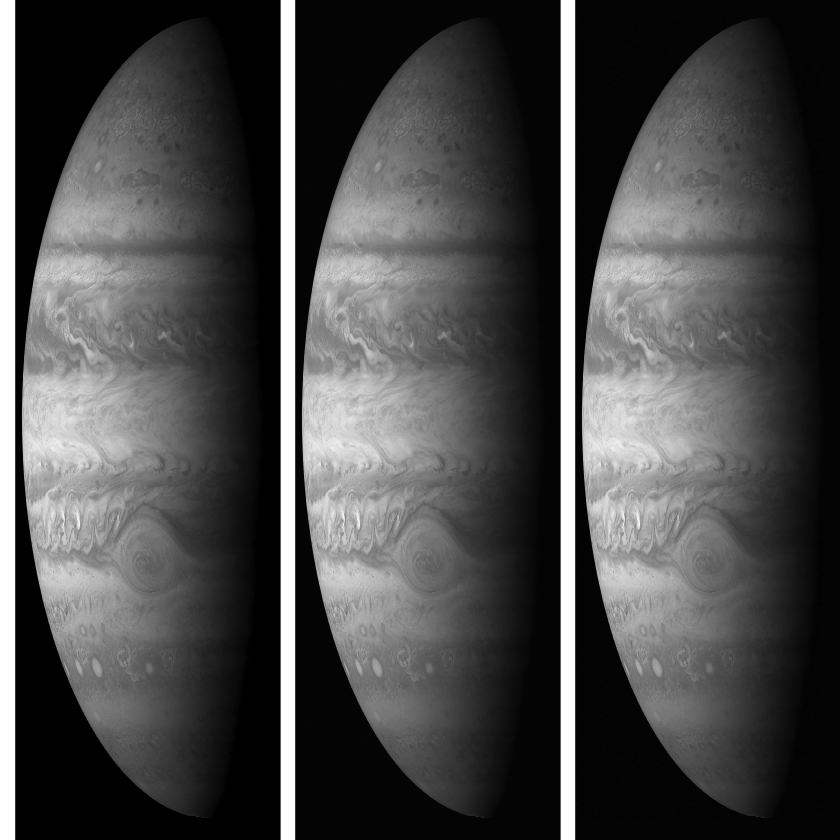

In [15]:
par(mfrow = c(1, 3), mar=c(0, 1, 0, 0))

showImage(X)
showImage(XSVD)
showImage(XrSVD)